In [8]:
import os
import argparse
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
from pprint import pprint

from config import EMBEDDINGS_DIR

In [3]:
dataset_name = 'wtc'

In [ ]:
seg_path = f'/cronus_data/rrao/{dataset_name if dataset_name == "hitop" else "wtc_clinic"}/seg_persona.csv'
seg_df = pd.read_csv(seg_path).drop(columns=['filename'])
seg_df

In [5]:
pca = PCA(n_components=3)
gt_emb_df = pd.read_csv(os.path.join(EMBEDDINGS_DIR, 'all-MiniLM-L12-v2', f'{dataset_name}_embeddings.csv'))
gt_embs_pca = pca.fit_transform(gt_emb_df[gt_emb_df.columns[1:]].values)
emb_df = pd.read_csv(os.path.join(EMBEDDINGS_DIR, 'whisper-384', f'{dataset_name}_embeddings.csv'))
embs_pca = pca.fit_transform(emb_df[emb_df.columns[1:]].values)
aligned_emb_df = pd.read_csv(os.path.join(EMBEDDINGS_DIR, 'whisper-384_mean_cos-sim_50_512_1e-5_1e-2', f'{dataset_name}_embeddings.csv'))
aligned_emb_pca = pca.fit_transform(aligned_emb_df[aligned_emb_df.columns[1:]].values)

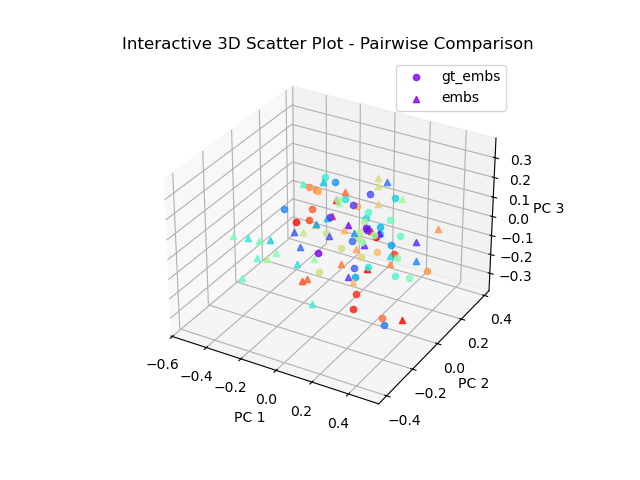

In [6]:
num_points = 50
# colors = plt.cm.viridis(np.linspace(0, 1, num_points))
colors = plt.cm.rainbow(np.linspace(0, 1, num_points))
# colors = plt.cm.jet(np.linspace(0, 1, num_points))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Step 3: Plot points from gt_embs_pca and embs_pca, using the same color for each pair
for i in range(num_points):
    # Plot a single point from gt_embs_pca
    ax.scatter(
        gt_embs_pca[i, 0],
        gt_embs_pca[i, 1],
        gt_embs_pca[i, 2],
        color=colors[i],
        label='gt_embs' if i == 0 else "",  # Label only the first instance for the legend
        alpha=0.8
    )
    
    # Plot the corresponding point from embs_pca
    ax.scatter(
        embs_pca[i, 0],
        embs_pca[i, 1],
        embs_pca[i, 2],
        color=colors[i],
        label='embs' if i == 0 else "",  # Label only the first instance for the legend
        marker='^',  # Different marker for differentiation
        alpha=0.8
    )

# Step 4: Set labels, legend, and title
ax.set_title('Interactive 3D Scatter Plot - Pairwise Comparison')
ax.legend()
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Display the plot
plt.show()

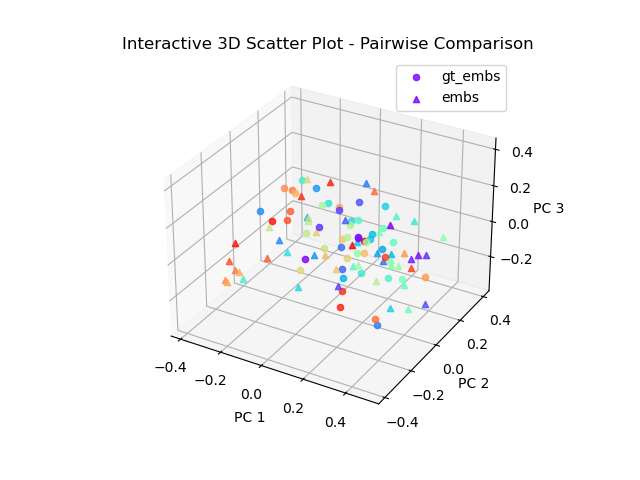

In [7]:
num_points = 50
# colors = plt.cm.viridis(np.linspace(0, 1, num_points))
colors = plt.cm.rainbow(np.linspace(0, 1, num_points))
# colors = plt.cm.jet(np.linspace(0, 1, num_points))

# Step 2: Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Step 3: Plot points from gt_embs_pca and embs_pca, using the same color for each pair
for i in range(num_points):
    ax.scatter(
        gt_embs_pca[i, 0],
        gt_embs_pca[i, 1],
        gt_embs_pca[i, 2],
        color=colors[i],
        label='gt_embs' if i == 0 else "",  # Label only the first instance for the legend
        alpha=0.8
    )
    
    ax.scatter(
        aligned_emb_pca[i, 0],
        aligned_emb_pca[i, 1],
        aligned_emb_pca[i, 2],
        color=colors[i],
        label='embs' if i == 0 else "",  # Label only the first instance for the legend
        marker='^',  # Different marker for differentiation
        alpha=0.8
    )

# Step 4: Set labels, legend, and title
ax.set_title('Interactive 3D Scatter Plot - Pairwise Comparison')
ax.legend()
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Display the plot
plt.show()

### Residual Correlation Plot for Result Visualization

In [ ]:
data = """
0.618
0.707
0.684
0.642
0.659
0.689
0.513
0.786
0.819
0.586
0.84
0.74
0.631
0.715
0.69
0.75
0.732
0.679
0.698
0.731
0.625
0.798
0.837
0.638
0.84
0.818
0.736
0.76
0.72
0.808
0.755
0.724
0.765
0.74
0.651
0.804
0.855
0.657
0.841
0.848
0.747
0.79
"""
data = data.strip().split('\n')
values = []
for i in range(0, len(data), 7):
    dataset = 'iHiTOP' if i % 14 else 'WTC'
    values.append({dataset: [float(v) for v in data[i:i+7]]})

import numpy as np
from pprint import pprint
averaged_arrays = []
for i in range(0, len(values), 2):
    wtc = np.array(values[i].get('WTC'))
    ihitop = np.array(values[i + 1].get('iHiTOP'))
    avg = (wtc + ihitop) / 2
    averaged_arrays.append(avg)
pprint(averaged_arrays)

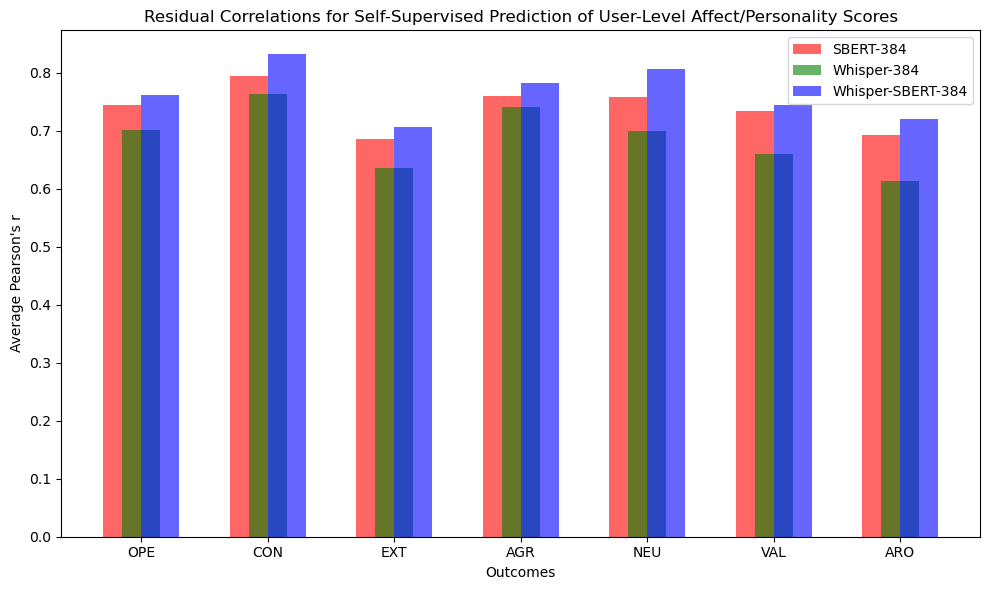

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
labels = ['OPE', 'CON', 'EXT', 'AGR', 'NEU', 'VAL', 'ARO']
whisper_values = [0.48, 0.69, 0.56, 0.68, 0.61, 0.58, 0.61, 0.22]
sbert_values = [0.63, 0.73, 0.69, 0.75, 0.73, 0.68, 0.70, 0.35]
better_values = [0.65, 0.75, 0.74, 0.81, 0.78, 0.73, 0.77, 0.34]

# Set up the x positions and width of each group of bars
x = np.arange(len(labels))
bar_width = 0.4

# Set up the x positions and width of each group of bars
x = np.arange(len(labels))
bar_width = 0.3  # Width of each individual bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars, slightly offset to overlap
ax.bar(x - bar_width / 2, averaged_arrays[1], width=bar_width, color='red', alpha=0.6, label='SBERT-384')
ax.bar(x, averaged_arrays[0], width=bar_width, color='green', alpha=0.6, label='Whisper-384')
ax.bar(x + bar_width / 2, averaged_arrays[2], width=bar_width, color='blue', alpha=0.6, label='Whisper-SBERT-384')

# Add labels and title
ax.set_xlabel('Outcomes')
ax.set_ylabel('Average Pearson\'s r')
ax.set_title('Residual Correlations for Self-Supervised Prediction of User-Level Affect/Personality Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()